# <center>Density-Based Clustering</center>

Большинство традиционных методов кластеризации, таких как k-средние, иерархическая и нечеткая кластеризация, могут использоваться для группировки данных без контроля.

Однако при применении к задачам с кластерами произвольной формы или кластерами внутри кластера традиционные методы могут оказаться не в состоянии достичь хороших результатов. То есть элементы в одном кластере могут не обладать достаточным сходством или производительность может быть низкой.
И кластеризация на основе плотности находит области высокой плотности, которые отделены друг от друга областями низкой плотности. Плотность в этом контексте определяется как количество точек в пределах указанного радиуса.



В этом разделе основное внимание будет уделяться манипулированию данными и свойствами DBSCAN и наблюдению за возникающей кластеризацией.

Импортируйте следующие библиотеки:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>DBSCAN</b> from <b>sklearn.cluster</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
    <li> <b>StandardScaler</b> from <b>sklearn.preprocessing</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
</ul> <br>
Помните, что <b> %matplotlib inline </b> отображает графики

In [1]:
# Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it
# !conda install -c conda-forge  basemap==1.1.0  matplotlib==2.2.2  -y
# Notice: you maight have to refresh your page and re-run the notebook after installation

In [2]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Генерация данных
Функция ниже генерирует точки данных и требует следующих входных данных:
<ul>
     <li> <b> centroidLocation </b>: координаты центроидов, которые будут генерировать случайные данные. </li>
     <ul> <li> Пример: ввод: [[4,3], [2, -1], [-1,4]] </li> </ul>
     <li> <b> numSamples </b>: Количество точек данных, которые мы хотим сгенерировать, разбито на количество центроидов (число центроидов, определенных в centroidLocation) </li>
     <ul> <li> Пример: 1500 </li> </ul>
     <li> <b> clusterDeviation </b>: Стандартное отклонение между кластерами. Чем больше число, тем больше расстояние. </li>
     <ul> <li> Пример: 0,5 </li> </ul>
</ul>

In [3]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Используйте <b> createDataPoints </b> с <b> 3 входами </b> и сохраните выходные данные в переменных <b> X </b> и <b> y </b>.

In [4]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### Моделирование
DBSCAN означает пространственную кластеризацию данных с шумом на основе плотности. Этот метод является одним из наиболее распространенных алгоритмов кластеризации, который работает на основе плотности.
Вся идея заключается в том, что если конкретная точка принадлежит кластеру, она должна быть рядом с множеством других точек в этом кластере.

Работает на основе двух параметров: Epsilon и Minimum Points.
__Epsilon__ определяет указанный радиус, который, если включает достаточное количество точек внутри, мы называем его плотной областью
__minimumSamples__ определяет минимальное количество точек данных, которое мы хотим в окрестности чтобы определить кластер.

In [5]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 0, 1, ..., 0, 1, 2], dtype=int64)

### Определение выбросов
Давайте заменим все элементы с «True» в core_samples_mask, которые находятся в кластере, «False», если точки являются выбросами.

In [6]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [7]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [8]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{0, 1, 2}

### Визуализация данных

In [9]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


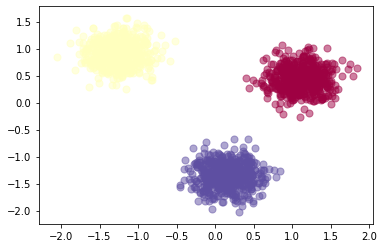

In [10]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

## Практика
Чтобы лучше понять различия между кластеризацией на основе разделения и плотностью, попробуйте сгруппировать вышеуказанный набор данных в 3 кластера, используя k-Means.
Примечание: не генерируйте данные снова, используйте тот же набор данных, что и выше.

In [28]:
# write your code here




Дважды щелкните __здесь__ чтобы увидеть решение.

<!-- Your answer is below:


from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()


-->




<h1 align=center> Кластеризация метеостанций с использованием DBSCAN и scikit-learn </h1>
<hr>

DBSCAN особенно хорош для таких задач, как идентификация классов в пространственном контексте. Преимущество алгоритма DBSCAN заключается в том, что он может обнаруживать любой кластер произвольной формы без воздействия шума. Например, в следующем примере показано расположение метеостанций в Канаде.

DBSCAN может использоваться, например, для поиска группы станций, которые показывают одинаковые погодные условия. Как вы можете видеть, он не только находит различные кластеры произвольной формы, может найти более плотную часть выборок, центрированных на данных, игнорируя менее плотные области или шумы.

Давайте начнем работать с данными. Мы будем работать в соответствии со следующим рабочим процессом:
- Загрузка данных
- Обзор данных
- Очистка данных
- Выборка данных
- Кластеризация

### Загрузка набора данных
Мы импортируем .csv, затем создадим столбцы для года, месяца и дня.

In [11]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3        DISCOVERY ISLAND  48.425 -123.226   BC  NaN   NaN  NaN  12.5   0.0   
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3  NaN  ...  NaN    NaN  NaN   NaN NaN   NaN  NaN    NaN  NaN  1012475  
4 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  

[5 rows x 25 columns]

### Очистка
Давайте удалим строки, которые не имеют никакого значения в поле __Tm__.

In [12]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  8.8   0.0  NaN  13.1   0.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  
4  1.9  ...  8.0    NaN  NaN  12.0 NaN   NaN  NaN  258.6  0.0  1012710  

[5 rows x 25 columns]

### Визуализация
Визуализация станций на карте с использованием пакета basemap. Инструментарий matplotlib basemap - это библиотека для построения 2D-данных на картах в Python. basemap сама по себе не выполняет никаких графиков, но предоставляет средства для преобразования координат в проекции карты.

Обратите внимание, что размер каждой точки данных представляет собой среднее значение максимальной температуры для каждой станции за год.

In [19]:
#Скачать https://www.lfd.uci.edu/~gohlke/pythonlibs/ basemap
#Изменить текущий каталог на каталог загрузок
#Установить wheel pip install basemap-1.2.1-cp37-cp37m-win_amd64.whl
#Установить pip install image

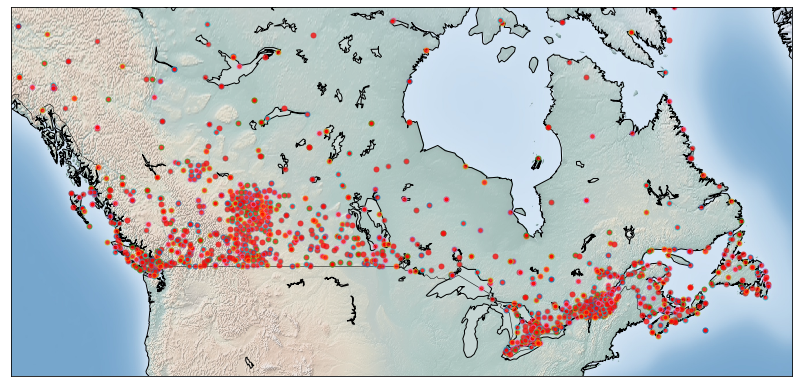

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



### Кластеризация станций в зависимости от их местоположения

Библиотека __DBSCAN__ формы sklearn может запускать кластеризацию DBSCAN из векторного массива или матрицы расстояний. В нашем случае мы передаем массив Numpy Clus_dataSet для поиска образцов высокой плотности и создания кластеров из них.

In [20]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

Как видно для выбросов, метка кластера равна -1

In [21]:
set(labels)

{-1, 0, 1, 2, 3, 4}

### Визуализация кластеров в зависимости от местоположения
Теперь мы можем визуализировать кластеры, используя basemap:

Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


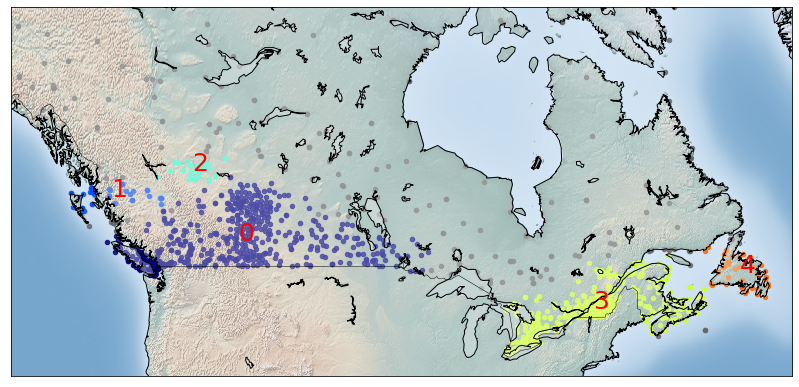

In [22]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

### Кластеризация станций на основе их местоположения, средней, максимальной и минимальной температуры.
В этом разделе мы повторно запустим DBSCAN, но на этот раз для 5-мерного набора данных:

In [23]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

### Визуализация кластеров на основе местоположения и температуры


Cluster 0, Avg Temp: 6.221192052980132
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882344
Cluster 3, Avg Temp: -13.87720930232558
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398496
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


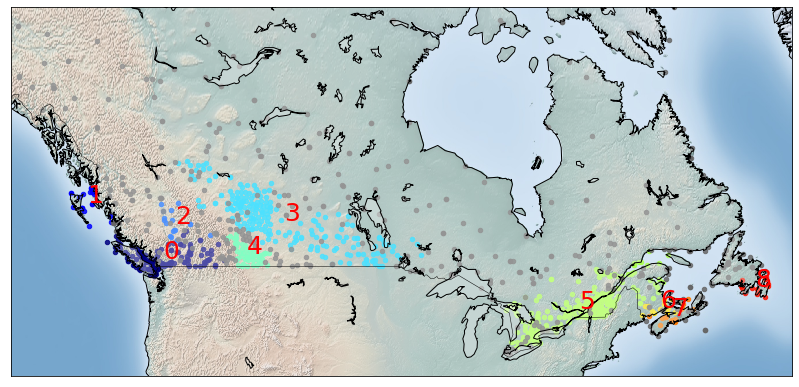

In [24]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))